In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('terrorism.csv',engine='python')

In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
((data.isnull().sum()/data.shape[0])*100) > 60

eventid       False
iyear         False
imonth        False
iday          False
approxdate     True
              ...  
INT_LOG       False
INT_IDEO      False
INT_MISC      False
INT_ANY       False
related        True
Length: 135, dtype: bool

In [5]:
b = pd.DataFrame((data.isnull().sum()/data.shape[0])*100)
b[b[0]>0]


,0
approxdate,94.914993
resolution,98.778145
provstate,0.231712
city,0.238867
latitude,2.507554
...,...
addnotes,84.430159
scite1,36.430533
scite2,57.657231
scite3,76.049447


In [6]:
list1 =[]
list2=[]
a = 0
for i in data.columns:
    if b.loc[i,0] > 60:
        a=a+1
        list1.append(i)
    else:
        list2.append(i)
#Assuming if there is a column with more than 60% of null values, drop that column

In [7]:
len(list1),len(list2),data.shape[1]
#Out of 135 Columns, we are dropping 75 Columns Become of the presence of more than 60% of null values

(75, 60, 135)

In [8]:
data.drop(columns=list1,inplace=True)

In [9]:
data.isnull().sum()

eventid                  0
iyear                    0
imonth                   0
iday                     0
extended                 0
country                  0
country_txt              0
region                   0
region_txt               0
provstate              421
city                   434
latitude              4556
longitude             4557
specificity              6
vicinity                 0
summary              66129
crit1                    0
crit2                    0
crit3                    0
doubtterr                1
multiple                 1
success                  0
suicide                  0
attacktype1              0
attacktype1_txt          0
targtype1                0
targtype1_txt            0
targsubtype1         10373
targsubtype1_txt     10373
corp1                42550
target1                636
natlty1               1559
natlty1_txt           1559
gname                    0
guncertain1            380
individual               0
nperps               71115
n

In [10]:
#Revised Data Shape 
data.shape

(181691, 60)

In [11]:
data['success'].head()

0    1
1    1
2    1
3    1
4    1
Name: success, dtype: int64

In [12]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid', 'ransom', 'scite1', 'scite2',
       'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [13]:
data.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,property,ishostkid,ransom,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,0,0.0,0.0,NaN,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,0,1.0,1.0,NaN,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,0,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,1,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,1,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1


In [14]:
data['region_txt'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

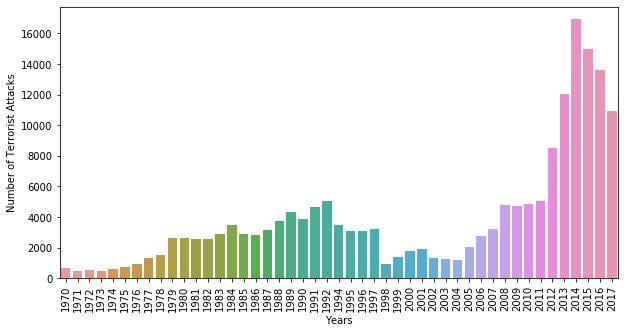

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data['iyear'])
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.ylabel('Number of Terrorist Attacks')
plt.show()
#The terrorist attacks are on the rise and the maximum number of terror attacks were witnesed during the year 2014
#Although, since then a decline can be witnessed.

In [16]:
13/22

0.5909090909090909

In [17]:
0.590*70

41.3

In [18]:
#Region Wise Terroist Attacks 
#Country Wise Terroist Attacks 
#Select top 5 countries and type of attacks comon
#See other Visulaizations
#killed vs wounded in type of attacks 
#statistical test on type of attack vs (killed, wounded), correl

In [19]:
#Region Wise Terroist Attacks 

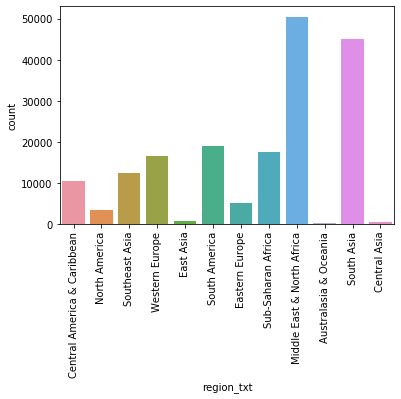

In [20]:
sns.countplot(data['region_txt'])
plt.xticks(rotation=90)
plt.show()
#The Maximum number of attacks between 1970 and 2017 happened in 'Middle East & North Africa'
#and 'South Asia'

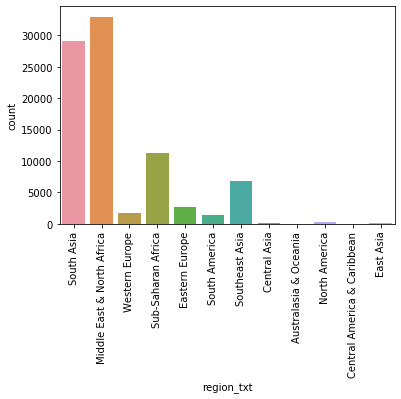

In [21]:
#Where were the most recent attacks?
sns.countplot(data['region_txt'][(data['iyear']>=2010)])
plt.xticks(rotation=90)
plt.show()
# We analysed attacks after the year 2010, and our data shows us the same result as before. 
# That is most of the recent attacks have been common in 'South Asia' and ''Middle East & North Africa'


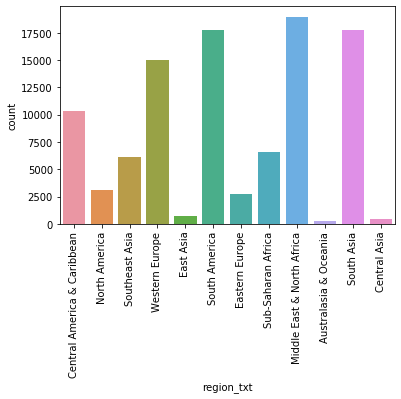

In [22]:
#Now, let's also see the variation in attacks before 2010
sns.countplot(data['region_txt'][(data['iyear']<=2010)])
plt.xticks(rotation=90)
plt.show()
#We see that terrorism was more active in other regions also like 'Central America & Caribbean',
#'Western Europe','Soith America' and also, 'South Asia' and ''Middle East & North Africa'

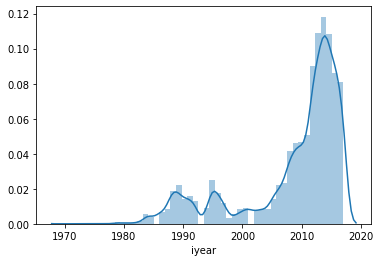

In [23]:
#We want to check whether the terrosist attacks increased in the years after 2010 in 
#'South Asia' and ''Middle East & North Africa'
sns.distplot(data['iyear'][data['region_txt']=='South Asia'])
plt.show()
#This is negatively-skewed distribution.  

In [24]:
#Let's try to find the statistical proof of this using one-sample t-test. 
#Mean of the number of attacks in the region South Asia
pm= data['iyear'][data['region_txt']=='South Asia'].value_counts().mean() #Population Mean
ps= data['iyear'][data['region_txt']=='South Asia'].value_counts().std() #Population Mean
pm,ps

(977.695652173913, 1382.4752337675625)

In [25]:
#Mean of the number of attacks after 2010 in the region of South Asia
sm= data['iyear'][data['iyear']>2010][data['region_txt']=='South Asia'].value_counts().mean()#Sample Mean
ss= data['iyear'][data['iyear']>2010][data['region_txt']=='South Asia'].value_counts().std() #Sample STD
sm,ss

(3886.4285714285716, 964.6724585997842)

In [26]:
import scipy.stats as stats

In [27]:
#We know the population Mean and Standard Deviation of the number of attacks in South Asia,
#Let's find out whether the sample mean(attacks after 2010) have increased or not using One-Sample T-test
#This will be a two-tail test
#Ho: 3886.42 = PM
#Ha: 3886.42 != PM
z_stat=(pm-sm)/ps
z_crit= stats.norm.isf(0.95)
print('Z-stat value: ',z_stat)
print('Z-critical value: ',z_crit) #Using the significane value of 95%
if z_stat<z_crit:
    print('We fail to accept the null hypothesis which also means that the terrorist attacks in South Asia after 2010 have increased')
else:
    print('We accept the null hypothesis which also means that attacks in South Asia have have not changed')
#We use the t-critical value
#How to perform the two tailed sample test in this case
#Doubt

Z-stat value:  -2.104003636526416
Z-critical value:  -1.6448536269514722
We fail to accept the null hypothesis which also means that the terrorist attacks in South Asia after 2010 have increased


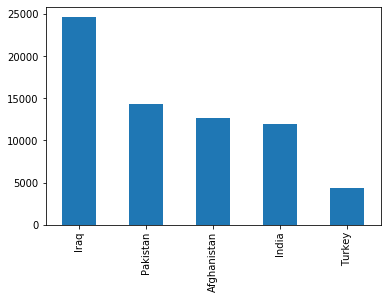

In [28]:
#Since we have found two regions which have had the most number of terroist attacks 
#Let's analyse in which countries were these attacks the most?
data[(data['region_txt']=='South Asia')|(data['region_txt']=='Middle East & North Africa')]['country_txt'].value_counts().head(5).plot(kind='bar')
plt.show()
#While looking at both of these regions,
#The most number of attacks were maximium in the following regions. 

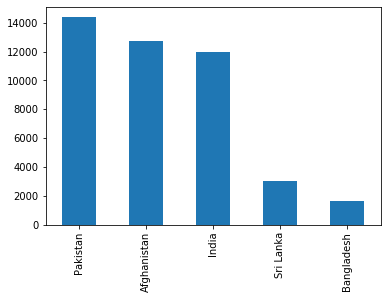

In [29]:
#If we looks at the regions seperately, then:
#For South Asia
data[(data['region_txt']=='South Asia')]['country_txt'].value_counts().head(5).plot(kind='bar')
plt.show()

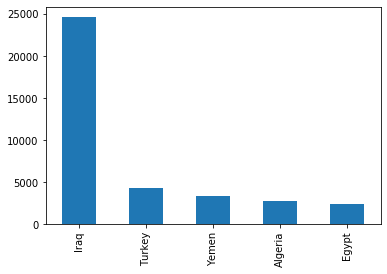

In [30]:
#For Middle East & North Africa
data[(data['region_txt']=='Middle East & North Africa')]['country_txt'].value_counts().head(5).plot(kind='bar')
plt.show()
#So, we conclude that Iraq, followed by Pakistan, Afghanistan, India had the maximum terorrist attacks.

In [31]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid', 'ransom', 'scite1', 'scite2',
       'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [32]:
data['attacktype1_txt'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

In [33]:
ca= pd.crosstab(data['attacktype1_txt'],data[(data['region_txt']=='South Asia')|(data['region_txt']=='Middle East & North Africa')]['country_txt'])
ca

country_txt,Afghanistan,Algeria,Bahrain,Bangladesh,Bhutan,Egypt,India,International,Iran,Iraq,...,Saudi Arabia,South Yemen,Sri Lanka,Syria,Tunisia,Turkey,United Arab Emirates,West Bank and Gaza Strip,Western Sahara,Yemen
attacktype1_txt,,,,,,,,,,,,,,,,,,,,,
Armed Assault,2877,913,37,292,0,790,3184,0,106,3155,...,95,0,998,199,39,1289,2,889,1,673
Assassination,954,431,3,164,0,249,1229,0,127,1287,...,8,0,438,94,8,437,5,332,0,434
Bombing/Explosion,6245,1088,123,791,5,1184,4825,1,347,18286,...,236,1,1151,1489,42,1957,12,653,2,1372
Facility/Infrastructure Attack,355,53,38,236,0,76,996,0,36,154,...,9,0,155,19,7,279,0,135,1,99
Hijacking,16,9,0,2,0,14,43,0,9,13,...,7,1,12,3,1,13,2,1,0,16
Hostage Taking (Barricade Incident),27,4,1,7,0,5,44,0,4,24,...,1,0,4,5,1,13,0,3,0,14
Hostage Taking (Kidnapping),1011,97,0,51,1,90,1184,0,20,946,...,6,0,94,246,6,158,1,80,1,382
Unarmed Assault,73,1,2,12,0,2,143,0,1,6,...,0,0,9,2,0,10,0,102,0,4
Unknown,1173,147,3,93,0,69,312,0,34,765,...,9,0,161,144,5,136,0,32,0,353


In [34]:
ca.reset_index()
n = ca.loc[:,['Iraq','Pakistan','India','Afghanistan','Turkey']]
# Now we want to understand whether the type of attack is depedent on the country(Top 5 in  South Asia)
#For that we will be using Chi_Square Test 
teststats, pvalue, df, exp_freq = stats.chi2_contingency(n)
print(pvalue,teststats)
#Doubt: Check whether this has been applied correctly 

0.0 7861.6225847375035


In [35]:
ca[['Iraq','Pakistan','India','Afghanistan','Turkey']]

country_txt,Iraq,Pakistan,India,Afghanistan,Turkey
attacktype1_txt,,,,,
Armed Assault,3155,3859,3184,2877,1289
Assassination,1287,1406,1229,954,437
Bombing/Explosion,18286,7613,4825,6245,1957
Facility/Infrastructure Attack,154,300,996,355,279
Hijacking,13,19,43,16,13
Hostage Taking (Barricade Incident),24,35,44,27,13
Hostage Taking (Kidnapping),946,823,1184,1011,158
Unarmed Assault,6,77,143,73,10
Unknown,765,236,312,1173,136


In [36]:
ca2= ['Iraq','Pakistan','India','Afghanistan','Turkey']
for i in ca.columns:
    for j in ca2:
        for z in ca.index:
            if i==j:
                ca.loc['z','i']=ca1.loc['z','i']
ca1

NameError: name 'ca1' is not defined

In [ ]:
for z in ca.index:
    print(z)

In [ ]:
ca1= pd.DataFrame({'Iraq':[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],'Pakistan':[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],'India':[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],'Afghanistan':[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan],'Turkey':[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]},
             index=['Armed Assault', 'Assassination', 'Bombing/Explosion',
       'Facility/Infrastructure Attack', 'Hijacking',
       'Hostage Taking (Barricade Incident)', 'Hostage Taking (Kidnapping)',
       'Unarmed Assault', 'Unknown'])
ca1

In [ ]:
data['attacktype1_txt'].value_counts(normalize=True)
#The highest number of attacks were of Bombing, folowed by Armed Assault.
#Now

In [ ]:
data[(data['region_txt']=='South Asia')|(data['region_txt']=='Middle East & North Africa')][['country_txt','attacktype1_txt']]

In [ ]:
Action Items:
# Explore plotly to improve visualizations 
#Heatmap between categorical, and heatmap between numerical
#most number of attacks in which city?
##Which countries have had which type of attacks? Possibilty of Chi-Square - data['targtype1_txt']
#data['ransom'].value_counts() #Should the column be removed?
#How should we treat the values?
#Possibilty of a sunburst? Enter a country : 

In [ ]:
data.columns


In [ ]:
data['specificity'].value_counts() #Should the column be removed?
#Which countries have had which type of attacks? Possibilty of Chi-Square - data['targtype1_txt']